In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# We will be using monthly data for our predictions
df = pd.read_csv("salesmonthly.csv")
df.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7
5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3
6,2014-07-31,117.06,95.010,129.300,491.900,348.0,21.0,61.0,69.1
7,2014-08-31,134.79,99.780,123.800,583.850,420.0,29.0,37.0,70.8
8,2014-09-30,108.78,109.094,122.100,887.820,399.0,14.0,115.0,58.8
9,2014-10-31,154.75,185.241,191.600,1856.815,472.0,30.0,182.0,74.5


In [ ]:
df.shape

(70, 9)

In [ ]:
df.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [ ]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


<AxesSubplot:>

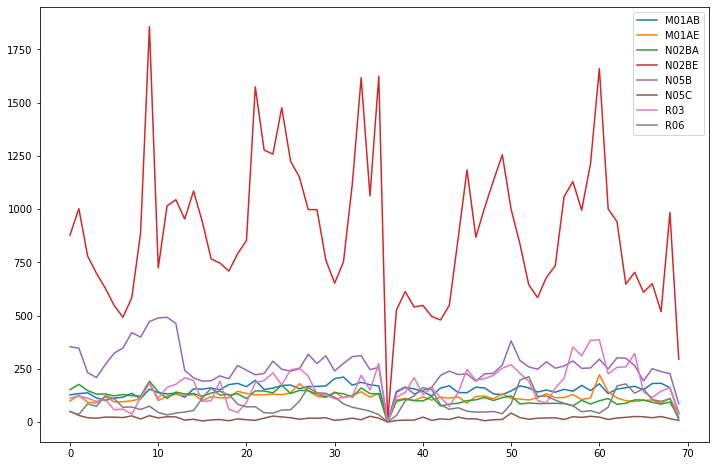

In [ ]:
df.plot()

In [ ]:
df.

Predictions for the product N05C sales in January 2020


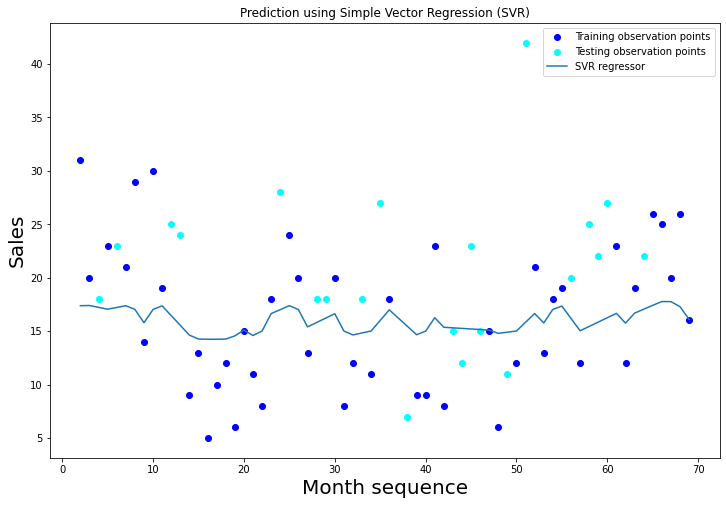

Simple Vector Regression (SVR): [16.01798737] (Accuracy: 26%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Simple Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('Simple Vector Regression (SVR): ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

product = 'N05C'

# For storing all regression results
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

# To display a larger graph than a default with specify some additional parameters for Matplotlib library.
rcParams['figure.figsize'] = 12, 8

# We will be using monthly data for our predictions
df = pd.read_csv("salesmonthly.csv")
df.head()
df.isnull().sum()

# We will use monthly sales data from 2014-2019.
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

df = df[df[product] != 0]

predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

regValues = {}
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

svrResult = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor = svrResult['regressor']
regValues['SVR'] = round(svrResult['values'][0])

Predictions for the product N05C sales in January 2020


<ipython-input-10-9c7ddd731979>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


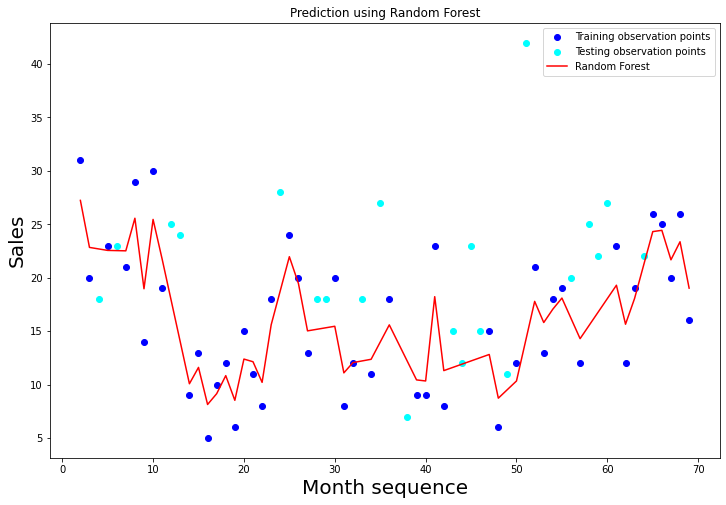

Random Forest : [19.03] (Accuracy: 85%)


{'regressor': RandomForestRegressor(random_state=2529),
 'values': array([19.03])}

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from sklearn.ensemble import VotingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

def predictRandomForest(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Random Forest')

    reg = RandomForestRegressor(random_state=2529)
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Random Forest')
    plt.legend()
    plt.show()

    y_predict = reg.predict(X_test)

    predict = reg.predict([[predictFor]])

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

   
    
    # Results
    print('Random Forest : ' + str(predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':predict}


product ='N05C'

# For storing all regression results
# regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

# To display a larger graph than a default with specify some additional parameters for Matplotlib library.
rcParams['figure.figsize'] = 12, 8

# We will be using monthly data for our predictions
df = pd.read_csv("salesmonthly.csv")

# We will use monthly sales data from 2014-2019.
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

df = df[df[product] != 0]

predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

regValues = {}
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

predictRandomForest(X_train, y_train, X_test, y_test)


In [ ]:
df.columns

Index(['index', 'datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C',
       'R03', 'R06', 'datumNumber'],
      dtype='object')

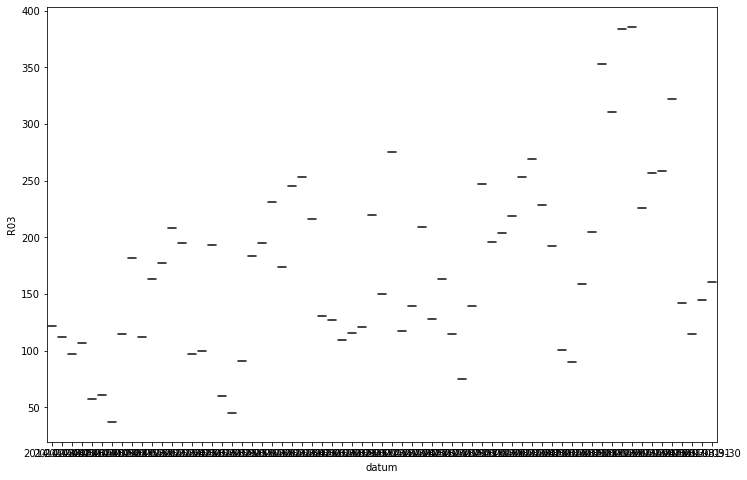

In [ ]:
sns.boxplot(x="datum",y="R03",data=df)

Predictions for the product R06 sales in January 2020


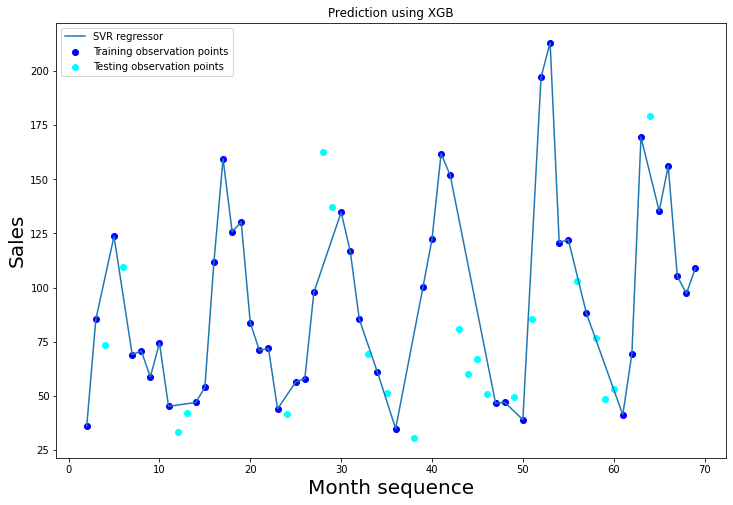

XGBOOST: [109.095726] (Accuracy: 100%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'XGB')

    svr_regressor = XGBRegressor(objective="reg:squarederror",n_estimators=1000)
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('XGBOOST: ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

product = 'R06'


# For storing all regression results
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

# To display a larger graph than a default with specify some additional parameters for Matplotlib library.
rcParams['figure.figsize'] = 12, 8

# We will be using monthly data for our predictions
df = pd.read_csv("salesmonthly.csv")

# We will use monthly sales data from 2014-2019.
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

df = df[df[product] != 0]

predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

regValues = {}
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

#svrResult = predictSVR(X_train, y_train, X_test, y_test)
#svr_regressor = svrResult['regressor']
#regValues['SVR'] = round(svrResult['values'][0])